In [137]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tqdm import tqdm
import audiofile as af

In [76]:
orig_text_df=pd.read_csv('consolidado_voz_base_orig.csv',delimiter=';',header =None)
orig_text_df['idx'] = orig_text_df[0].replace({'.txt':''},regex=True)


,0,1
idx,,
JornalNacional_01_00001,JornalNacional_01_00001.txt,O Brasil registrou 2.798 mortes em vinte e qua...
JornalNacional_01_00002,JornalNacional_01_00002.txt,"Em vinte e quatro horas, 84.124 novos casos fo..."
JornalNacional_01_00003,JornalNacional_01_00003.txt,A tendência é de alta também na média diária d...
JornalNacional_01_00004,JornalNacional_01_00004.txt,"Com alta na média de mortes, estão vinte e doi..."
JornalNacional_01_00005,JornalNacional_01_00005.txt,O total de vacinados no Brasil com a primeira ...
JornalNacional_01_00006,JornalNacional_01_00006.txt,Veja aqui outros dados do seu estado e mais in...
JornalNacional_01_00007,JornalNacional_01_00007.txt,"A fila da marmita começa cedo, todos os dias, ..."
JornalNacional_01_00008,JornalNacional_01_00008.txt,Repórter: Como estava a sua vida quando a pand...
JornalNacional_01_00009,JornalNacional_01_00009.txt,"Lenice Almeida Silva, empregada doméstica dese..."


In [9]:
df = pd.DataFrame()

In [43]:
names_txt = glob('voz_base/txts/*')
texts = []
for name in names_txt:
    with open(name,'r') as f:
        texts.append(f.read())
texts

['O médico Ederlon Rezende, que trabalha na rede pública e é da Associação de Medicina Intensiva Brasileira, diz que continuamos cometendo os mesmos erros.',
 'O senador Otto Alencar, do pê ésse dê, que é médico, usou informações científicas para desqualificar os argumentos de Nise.',
 'Só que um dia depois das declarações de Bolsonaro, o então secretário-executivo do Ministério da Saúde, coronel Elcio Franco, disse em coletiva que não havia intenção de adquirir a CoronaVac: Não há intenção de compra de vacinas chinesas.',
 'Os árbitros que estão em treinamento no Paraguai e as delegações da Bolívia, da Venezuela, do Paraguai, do Uruguai, do Equador e do Chile já receberam pelo menos a primeira dose. Mas, na segunda-feira trinta e um.',
 'A União Química informou, nesta sexta (doze), que vai entregar a documentação na próxima semana. Governadores e prefeitos também esperam que a farmacêutica resolva as pendências com a Anvisa para importar a vacina Sputnik.',
 'Nossa expectativa é que 

In [17]:
import difflib

In [4]:
import librosa

In [64]:
names_wavs = glob('/home/ubuntu/voice_data/voz_base/converted_audios/*')
wavs_len = []
for name in tqdm(names_wavs):
    with open(name,'r') as f:
        wav,sr = af.read(name)
        wavs_len.append(len(wav)/sr)
        
len(wavs_len)

100%|██████████| 5484/5484 [00:23<00:00, 232.29it/s] 


5484

In [12]:
len(wavs_len),len(names_wavs),len(names_txt)

(5484, 5484, 5484)

In [41]:
import os
clean_names = sorted([os.path.splitext(os.path.basename(x))[0] for x in names_txt])
clean_names

['JornalNacional2_01_00001',
 'JornalNacional2_01_00002',
 'JornalNacional2_01_00003',
 'JornalNacional2_01_00004',
 'JornalNacional2_01_00005',
 'JornalNacional2_01_00006',
 'JornalNacional2_01_00007',
 'JornalNacional2_01_00008',
 'JornalNacional2_01_00009',
 'JornalNacional2_01_00010',
 'JornalNacional2_01_00011',
 'JornalNacional2_01_00012',
 'JornalNacional2_01_00013',
 'JornalNacional2_01_00014',
 'JornalNacional2_01_00015',
 'JornalNacional2_01_00016',
 'JornalNacional2_01_00017',
 'JornalNacional2_01_00018',
 'JornalNacional2_01_00019',
 'JornalNacional2_01_00020',
 'JornalNacional2_01_00021',
 'JornalNacional2_01_00022',
 'JornalNacional2_01_00023',
 'JornalNacional2_01_00024',
 'JornalNacional2_01_00025',
 'JornalNacional2_01_00026',
 'JornalNacional2_01_00027',
 'JornalNacional2_01_00028',
 'JornalNacional2_01_00029',
 'JornalNacional2_01_00030',
 'JornalNacional2_01_00031',
 'JornalNacional2_01_00032',
 'JornalNacional2_01_00033',
 'JornalNacional2_01_00034',
 'JornalNacion

In [49]:
clean_texts = list(np.array(texts)[list(np.argsort(names_txt))])
len(clean_texts)

5484

In [65]:
clean_names2 = sorted([os.path.splitext(os.path.basename(x))[0] for x in names_wavs])
clean_names2 ==clean_names

True

In [92]:
df = pd.DataFrame()
df['name'] = clean_names
df['duration'] = wavs_len
df['text'] = clean_texts


In [100]:
df

,name,duration,text,num_words
0,JornalNacional2_01_00001,12.725442,"No depoimento, o pê ême afirmou que a equipe d...",44
1,JornalNacional2_01_00002,11.970748,"A mãe de Katelen, Jaqueline Oliveira, contesta...",44
2,JornalNacional2_01_00003,12.958186,"Durante o tiro, ela estava comigo. Durante o t...",48
3,JornalNacional2_01_00004,5.496463,Eles dizem que não havia vestígio de balas ou ...,46
4,JornalNacional2_01_00005,16.578639,Os investigadores apontam um problema grave: c...,35
5,JornalNacional2_01_00006,15.778866,"Nesta quinta-feira dez, dois dias depois do cr...",41
6,JornalNacional2_01_00007,12.548481,O ministro do ésse tê éfe Gilmar Mendes escrev...,39
7,JornalNacional2_01_00008,14.431383,"O namorado de Katelen, Marcelo Ramos, o pai do...",38
8,JornalNacional2_01_00009,13.702857,"Logo depois, um homem identificado apenas como...",29
9,JornalNacional2_01_00010,10.825215,"No inquérito entregue ao Supremo, a pê éfe dei...",30


In [151]:
cols = ['name','duration','text_orig','text_norm']
df['idx'] = df['name']
df = df.set_index(['idx'])
metadata_df = df.join(orig_text_df.set_index('idx')[1]).reset_index().drop(columns=['idx']).rename(columns={'text':'text_norm',1:'text_orig'})[cols]
metadata_df[500:600]#.to_csv('metadata_full_20h.csv')

,name,duration,text_orig,text_norm
500,JornalNacional2_02_00002,7.602358,"No encontro, os especialistas apresentaram a B...","No encontro, os especialistas apresentaram a B..."
501,JornalNacional2_02_00003,10.670794,"Na reunião, o virologista Paolo Zanotto aconse...","Na reunião, o virologista Paolo Zanotto aconse..."
502,JornalNacional2_02_00004,14.413787,A gente tem que tomar um cuidado enorme com is...,A gente tem que tomar um cuidado enorme com is...
503,JornalNacional2_02_00005,10.951565,"Arthur Weintraub, irmão do ex-ministro da Educ...","Arthur vaintraubi, irmão do ex-ministro da Edu..."
504,JornalNacional2_02_00006,8.793107,"Usando uma expressão inglesa, Zanotto propôs a...","Usando uma expressão inglesa, Zanotto propôs a..."
505,JornalNacional2_02_00007,10.286531,Eu gostaria de ajudar o Executivo a montar um ...,Eu gostaria de ajudar o Executivo a montar um ...
506,JornalNacional2_02_00008,13.080227,"Em seguida, Bolsonaro falou aos médicos que ve...","Em seguida, Bolsonaro falou aos médicos que ve..."
507,JornalNacional2_02_00009,9.822041,Eu falei outro dia: ‘Ninguém vai ser obrigado ...,Eu falei outro dia: ‘Ninguém vai ser obrigado ...
508,JornalNacional2_02_00010,15.834966,"Na reunião, Osmar Terra aparece com destaque. ...","Na reunião, Osmar Terra aparece com destaque. ..."
509,JornalNacional2_02_00011,6.144444,Eu vou entrar em contato imediatamente com o m...,Eu vou entrar em contato imediatamente com o m...


In [101]:
from collections import Counter
import datetime
total_time = str(datetime.timedelta(seconds=int(sum(wavs_len))))
phrases = list(metadata_df['text_orig'])
counter = Counter(" ".join(phrases).split(" ")).items()
distinct_words = len(counter)
num_words = 0
for item in counter:
    num_words+=item[1]
total_words = num_words
info ={
    'Total Clips': len(df),
    'Total Words': total_words,
    'Total Duration': total_time,
    'Mean Clip Duration': round(np.mean(wavs_len),2),
    'Max Clip Duration': round(max(wavs_len),2),
    'Min Clip Duration': round(min(wavs_len),2),
    'Distinct Words': distinct_words
}

info

{'Total Clips': 5484,
 'Total Words': 178873,
 'Total Duration': '19:56:30',
 'Mean Clip Duration': 13.09,
 'Max Clip Duration': 31.05,
 'Min Clip Duration': 4.78,
 'Distinct Words': 23407}

In [109]:
metadata_df['num_words'] = metadata_df['text_orig'].str.replace('-','').str.strip().str.count(' ') + 1
metadata_df['num_words'].mean()

32.61652078774617

(array([ 27., 153., 235., 274., 350., 374., 422., 658., 956., 967., 633.,
        303.,  94.,  33.,   5.]),
 array([10., 13., 16., 19., 22., 25., 28., 31., 34., 37., 40., 43., 46.,
        49., 52., 55.]),
 <BarContainer object of 15 artists>)

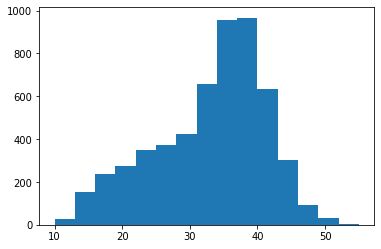

In [141]:
plt.hist(metadata_df['num_words'],bins=15)

(array([1.540e+02, 3.600e+02, 5.150e+02, 5.890e+02, 1.107e+03, 1.524e+03,
        8.570e+02, 2.470e+02, 5.900e+01, 3.400e+01, 1.900e+01, 1.300e+01,
        4.000e+00, 1.000e+00, 1.000e+00]),
 array([ 4.7845805 ,  6.53564928,  8.28671807, 10.03778685, 11.78885563,
        13.53992441, 15.2909932 , 17.04206198, 18.79313076, 20.54419955,
        22.29526833, 24.04633711, 25.7974059 , 27.54847468, 29.29954346,
        31.05061224]),
 <BarContainer object of 15 artists>)

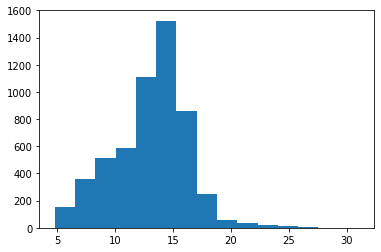

In [142]:
plt.hist(metadata_df['duration'],bins=15)

In [114]:
metadata_df['text_norm']

0       No depoimento, o pê ême afirmou que a equipe d...
1       A mãe de Katelen, Jaqueline Oliveira, contesta...
2       Durante o tiro, ela estava comigo. Durante o t...
3       Eles dizem que não havia vestígio de balas ou ...
4       Os investigadores apontam um problema grave: c...
5       Nesta quinta-feira dez, dois dias depois do cr...
6       O ministro do ésse tê éfe Gilmar Mendes escrev...
7       O namorado de Katelen, Marcelo Ramos, o pai do...
8       Logo depois, um homem identificado apenas como...
9       No inquérito entregue ao Supremo, a pê éfe dei...
10      A Polícia Federal investiga ainda a existência...
11      Facuri escreveu: Seria uma proposta de um pleb...
12      Para viabilizar essa ideia, eles discutiram a ...
13      Ciente das dificuldades, Facuri sugeriu: Preci...
14      As investigações apontam ainda que o empresári...
15      A investigação dos atos antidemocráticos foi a...
16      Investigadores ouvidos pela tê vê Globo classi...
17      Este d

In [118]:
names_txt = glob('/home/ubuntu/voice_data/alcaim/Alcione_F018/*.txt')
texts = []
for name in names_txt:
    with open(name,'r') as f:
        texts.append(f.read().split('\n')[0])
texts

['o modelo foi reestilizado e ganhou linhas mais agressivas',
 'visitados todos na ocasião por delegações de grandes empresários',
 'claro que a burrice é maior do que a pedra da gávea',
 'esta espécie de ruído desaparece após uma noite de sono',
 'o australiano vem logo em seguida com quarenta e um pontos',
 'expedito andrelino de souza cinquenta e um anos encarregado de almoxarifado',
 'não vejo motivo para impugnar uma candidatura presidencial por tão pouco crime',
 'simultaneamente a amizade inicialmente manifestada por laura se disfez',
 'o mercado de ações vive momentos de plena euforia',
 'em grande fase é a nova sensação do time',
 'será sexta e sábado às vinte e duas horas',
 'acho que a gastrite foi uma descarga da parte psicológica no corpo',
 'não se conformam que eles os fatos sejam fatos',
 'não é o primeiro carregamento de armas para angola',
 'ninguém menos que pelé classificou a colômbia como favorita ao título',
 'perdemos uma ótima oportunidade de fazer a revisão con

In [134]:
names_wav = [os.path.splitext(os.path.basename(x))[0][5:] + '.mp3' for x in names_txt]
sort_idx = np.argsort(names_wav)
names_sort = np.sort(names_wav)
txts_raw = np.array(texts)[sort_idx]
names_sort

array(['0000.mp3', '0001.mp3', '0002.mp3', '0003.mp3', '0004.mp3',
       '0005.mp3', '0006.mp3', '0007.mp3', '0008.mp3', '0009.mp3',
       '0010.mp3', '0011.mp3', '0012.mp3', '0013.mp3', '0014.mp3',
       '0015.mp3', '0016.mp3', '0017.mp3', '0018.mp3', '0019.mp3',
       '0020.mp3', '0021.mp3', '0022.mp3', '0023.mp3', '0024.mp3',
       '0025.mp3', '0026.mp3', '0027.mp3', '0028.mp3', '0029.mp3',
       '0030.mp3', '0031.mp3', '0032.mp3', '0033.mp3', '0034.mp3',
       '0035.mp3', '0036.mp3', '0037.mp3', '0038.mp3', '0039.mp3',
       '0040.mp3', '0041.mp3', '0042.mp3', '0043.mp3', '0044.mp3',
       '0045.mp3', '0046.mp3', '0047.mp3', '0048.mp3', '0049.mp3',
       '0050.mp3', '0051.mp3', '0052.mp3', '0053.mp3', '0054.mp3',
       '0055.mp3', '0056.mp3', '0057.mp3', '0058.mp3', '0059.mp3',
       '0060.mp3', '0061.mp3', '0062.mp3', '0063.mp3', '0064.mp3',
       '0065.mp3', '0066.mp3', '0067.mp3', '0068.mp3', '0069.mp3',
       '0070.mp3', '0071.mp3', '0072.mp3', '0073.mp3', '0074.m

In [135]:
df_alcaim = pd.DataFrame()
df_alcaim['wav'] = names_sort
df_alcaim['txt'] = txts_raw
df_alcaim#.to_csv('df_alcaim_mp3.csv',header=None,sep='|',index=None)

,wav,txt
0,0000.mp3,pesquisa é uma coisa que muda a toda hora
1,0001.mp3,no total serão chamados vinte e seis mil candi...
2,0002.mp3,o número de convocados por vaga é de doze cand...
3,0003.mp3,atualmente esse abatimento é limitado a setent...
4,0004.mp3,sandra regina machado acho que ela enfim criou...
5,0005.mp3,eles estão colocando armadilhas nas fazendas o...
6,0006.mp3,dessas somente umas trezentas e vinte foram in...
7,0007.mp3,no total sete mísseis foram disparados contra ...
8,0008.mp3,em florianópolis foi registrado dois graus cel...
9,0009.mp3,as situações ditas embaraçosas são resolvidas ...


In [169]:
df_PH = pd.read_csv('df_alcaim_punct.csv',header=None).drop(columns=[2])
df_PH_format = pd.DataFrame()
df_PH_format['filename'] = 'voz_alcaim/converted_audios/M049-'+df_PH[0]
df_PH_format['filename'] = df_PH_format['filename'].str.replace('.mp3','.wav',regex=True)
df_PH_format['text'] = df_PH[1]
df_PH_format.to_csv('df_ph.txt',sep="|",header=None,index=None)

In [144]:
df_cvm =pd.read_csv('validated.tsv',delimiter='\t')
phrases = list(df_cvm['sentence'])
counter = Counter(" ".join(phrases).split(" ")).items()
distinct_words = len(counter)
distinct_words

32621

In [145]:
num_words = 0
for item in counter:
    num_words+=item[1]
total_words = num_words
total_words

495668

In [97]:
df_cadu = pd.read_csv('Cadu/Cadu_10h.csv',delimiter=';')
df_cadu[' Texto'].replace(' ', np.nan, inplace=True)
df_cadu = df_cadu.dropna()
df_cadu['Nome Do Arquivo'] = 'cadu_' + df_cadu['Nome Do Arquivo'].replace('.mp3','',regex=True)
df_cadu

,Nome Do Arquivo,Tempo,Texto
0,cadu_00009,5.18,Treze Dias Longe do Sol. Minissérie em dez cap...
1,cadu_00011,4.45,Como reconstruir?. Como reconstruir?.
4,cadu_00017,4.04,Ele caiu na estrada para tentar encontrar o fi...
5,cadu_00018,6.15,E vai descobrir que precisa encontrar também u...
6,cadu_00019,4.25,Quinta!. Novo dia da Sessão Brasil!.
...,...,...,...
6988,cadu_11629,5.96,"Ideia, propostas, perguntas de candidato para ..."
6989,cadu_11630,4.15,Debate com candidatos à presidência da república.
6990,cadu_11631,5.75,Quinta! Amanhã! Hoje! Depois de Segundo Sol.
6991,cadu_11632,4.17,Debate com candidatos à presidência da república.


In [100]:
df_cadu_modified = pd.DataFrame()
df_cadu_modified[0] = df_cadu['Nome Do Arquivo']
df_cadu_modified[1] = df_cadu[' Texto']
df_cadu_modified[2] = df_cadu[' Texto']
df_cadu_modified.to_csv('Cadu/cadu_processed/metadata.csv',sep='|',header=None,index=None)

In [101]:

for index, row in df_cadu_modified.iterrows():
    print(index)
    filename = row[0]
    src_wav = 'Cadu/wavs/' +filename + '.wav'
    dest_wav = 'Cadu/cadu_processed/wavs/'
    src_txt = row[1]
    dest_txt = 'Cadu/cadu_processed/txt/' + filename + '.txt'
    !cp $src_wav $dest_wav
    with open(dest_txt, 'w+') as f:
        f.write(src_txt)

0
1
4
5
6
7
8
9
12
14
15
18
19
20
22
23
24
27
28
29
30
31
32
33
36
37
38
40
41
42
43
44
45
46
48
49
50
51
53
54
55
57
58
59
60
61
62
64
65
66
70
71
72
73
74
75
76
77
78
79
80
82
84
85
86
87
89
90
91
92
93
94
97
98
100
101
103
104
106
108
109
111
112
113
115
116
118
119
121
122
124
125
126
127
128
130
131
132
133
134
135
136
137
138
139
140
141
142
143
145
146
147
148
149
150
151
152
153
154
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
172
173
174
175
176
177
178
179
180
181
182
183
184
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
212
213
214
215
216
217
218
219
220
221
222
223
225
226
227
228
229
230
231
232
233
235
236
237
238
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
275
276
277
278
279
280
281
283
284
285
286
288
289
290
291
292
294
295
298
299
300
301
302
303
304
305
306
307
308
311
312
313
315
316
320
321
322
323
324
325
326
32

2257
2258
2259
2260
2261
2262
2263
2264
2265
2267
2268
2269
2270
2272
2273
2274
2277
2278
2281
2282
2283
2285
2286
2287
2288
2289
2290
2291
2292
2294
2295
2296
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2310
2313
2315
2316
2317
2319
2320
2321
2323
2324
2325
2327
2328
2330
2331
2333
2335
2336
2337
2338
2339
2341
2342
2344
2345
2346
2347
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2366
2367
2369
2370
2373
2374
2375
2377
2378
2379
2382
2383
2385
2386
2388
2390
2391
2392
2393
2394
2395
2396
2397
2399
2400
2401
2402
2403
2404
2407
2408
2409
2410
2411
2412
2414
2416
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2431
2432
2434
2435
2436
2437
2439
2440
2441
2443
2446
2447
2448
2449
2450
2451
2452
2454
2455
2456
2457
2458
2459
2460
2463
2465
2467
2469
2470
2471
2472
2473
2475
2477
2479
2480
2483
2484
2485
2488
2489
2490
2491
2492
2494
2496
2498
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517


4320
4321
4322
4323
4324
4325
4329
4330
4332
4333
4334
4335
4336
4337
4338
4339
4340
4342
4343
4345
4346
4347
4348
4349
4350
4351
4352
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4374
4375
4376
4377
4378
4379
4380
4381
4383
4385
4386
4387
4388
4389
4390
4391
4392
4394
4395
4396
4397
4398
4399
4401
4402
4404
4405
4406
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4421
4422
4423
4424
4425
4426
4427
4428
4429
4431
4432
4434
4435
4437
4438
4439
4440
4441
4443
4444
4445
4446
4447
4448
4450
4451
4453
4454
4455
4456
4457
4459
4460
4461
4462
4463
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4477
4478
4479
4480
4482
4483
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4498
4499
4500
4502
4503
4504
4506
4507
4508
4510
4511
4512
4514
4516
4517
4518
4519
4520
4521
4523
4524
4525
4526
4528
4529
4530
4531
4532
4533
4536
4537
4538
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557


6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6309
6310
6311
6312
6313
6315
6317
6318
6319
6320
6321
6322
6324
6326
6327
6328
6330
6331
6332
6333
6334
6336
6337
6338
6339
6340
6341
6342
6347
6348
6349
6351
6352
6353
6354
6355
6357
6359
6360
6361
6362
6363
6364
6365
6366
6367
6368
6369
6370
6371
6372
6373
6374
6375
6376
6377
6378
6380
6381
6382
6383
6384
6385
6386
6387
6388
6390
6391
6392
6393
6394
6395
6396
6397
6398
6400
6402
6403
6404
6405
6407
6408
6409
6410
6412
6413
6414
6415
6416
6417
6418
6419
6421
6423
6424
6425
6427
6428
6429
6430
6431
6432
6433
6434
6436
6437
6438
6439
6440
6441
6442
6443
6444
6445
6446
6447
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6461
6462
6463
6464
6465
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6481
6482
6484
6485
6486
6487
6488
6489
6490
6491
6492
6493
6494
6495
6497
6498
6499
6500
6501
6502
6503
6504
6505
6506
6507
6508
6509
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6522


In [31]:
df_dirceu = pd.read_csv('dirceu_minimo1s/metadata.csv',delimiter='|',header=None)
df_dirceu

,0,1,2
0,dirceu_00003,E quais são as profissões do futuro.,E quais são as profissões do futuro.
1,dirceu_00004,Três assuntos em reportagens especiais que voc...,Três assuntos em reportagens especiais que voc...
2,dirceu_00011,Amanhã depois da minissérie Elis o segundo epi...,Amanhã depois da minissérie Elis o segundo epi...
3,dirceu_00001,Um ano da tragédia do Largo do Paissandú.,Um ano da tragédia do Largo do Paissandú.
4,dirceu_00002,Vinte e cinco anos da morte do piloto Ayrton S...,Vinte e cinco anos da morte do piloto Ayrton S...
...,...,...,...
8194,dirceu_23592,O Outro Lado do Paraíso!,O Outro Lado do Paraíso!
8195,dirceu_23593,"Em seguida, Vasco e Cruzeiro se reencontram na...","Em seguida, Vasco e Cruzeiro se reencontram na..."
8196,dirceu_23595,"E ainda, Caco Barcelos e sua equipe mostram a ...","E ainda, Caco Barcelos e sua equipe mostram a ..."
8197,dirceu_23597,"Hoje, depois do Jornal Nacional, Clara tem a c...","Hoje, depois do Jornal Nacional, Clara tem a c..."


In [124]:
df_total = pd.concat([df_cadu_modified,df_dirceu])
df_total.to_csv('combined/metadata.csv',sep='|',header=None,index=None)

In [106]:
cadu_total_clips = len(df_cadu)
from collections import Counter
cadu_total_clips

5645

In [104]:
phrases = list(df_cadu[' Texto'])
counter = Counter(" ".join(phrases).split(" ")).items()
distinct_words = len(counter)
distinct_words

8585

In [105]:
num_words = 0
for item in counter:
    num_words+=item[1]
total_words = num_words
total_words

69914

In [111]:
import numpy as np
np.max(df_cadu[' Tempo'].astype(float))


    

17.99

In [112]:
np.min(df_cadu[' Tempo'].astype(float))

4.0

In [117]:
np.sum(df_cadu[' Tempo'].astype(float))

36827.54

In [118]:
np.mean(df_cadu[' Tempo'].astype(float))

6.523922054915855

In [119]:
(36827.54 + 8199*4.33)/(8199+5645)

5.2245889916209185

In [122]:
phrases = list(df_total[1])
counter = Counter(" ".join(phrases).split(" ")).items()
distinct_words = len(counter)
distinct_words

13427

In [123]:
num_words = 0
for item in counter:
    num_words+=item[1]
total_words = num_words
total_words

148457

In [127]:
df_audiolist = pd.DataFrame()
df_audiolist[0] = 'LJSpeech-1.1/wavs/' + df_cadu_modified[0] + '.wav'
df_audiolist[1] = df_cadu_modified[1]
#df_audiolist.to_csv('Cadu/ljs_audio_text_filelist.txt')

,0,1
0,LJSpeech-1.1/wavs/cadu_00009.wav,Treze Dias Longe do Sol. Minissérie em dez cap...
1,LJSpeech-1.1/wavs/cadu_00011.wav,Como reconstruir?. Como reconstruir?.
4,LJSpeech-1.1/wavs/cadu_00017.wav,Ele caiu na estrada para tentar encontrar o fi...
5,LJSpeech-1.1/wavs/cadu_00018.wav,E vai descobrir que precisa encontrar também u...
6,LJSpeech-1.1/wavs/cadu_00019.wav,Quinta!. Novo dia da Sessão Brasil!.
...,...,...
6988,LJSpeech-1.1/wavs/cadu_11629.wav,"Ideia, propostas, perguntas de candidato para ..."
6989,LJSpeech-1.1/wavs/cadu_11630.wav,Debate com candidatos à presidência da república.
6990,LJSpeech-1.1/wavs/cadu_11631.wav,Quinta! Amanhã! Hoje! Depois de Segundo Sol.
6991,LJSpeech-1.1/wavs/cadu_11632.wav,Debate com candidatos à presidência da república.


In [170]:
train, validate, test = \
              np.split(df_audiolist.sample(frac=1, random_state=42), 
                       [int(.9*len(df_audiolist)), int(.95*len(df_audiolist))])

In [171]:
train

,0,1
718,LJSpeech-1.1/wavs/cadu_01099.wav,Em um papo sobre um dos maiores escritores bra...
1591,LJSpeech-1.1/wavs/cadu_02473.wav,"Celeste invicta, sem tomar nenhum gol e Cavani..."
4720,LJSpeech-1.1/wavs/cadu_07573.wav,A briga pelo título está de volta ao Campeonat...
4945,LJSpeech-1.1/wavs/cadu_07897.wav,"E a corrida pela vaga na Libertadores, tá pega..."
3489,LJSpeech-1.1/wavs/cadu_05680.wav,"É hoje, depois do Faustão, você vai ver."
...,...,...
4628,LJSpeech-1.1/wavs/cadu_07440.wav,Agora os caminhos de Vasco e Cruzeiro. Agora o...
2984,LJSpeech-1.1/wavs/cadu_04809.wav,As expectativas para a final do Paulistão!.
4064,LJSpeech-1.1/wavs/cadu_06577.wav,"Uma história de Amor, ódio e perdão."
1914,LJSpeech-1.1/wavs/cadu_03003.wav,Brasil e Peru. A grande final da Copa América....


In [172]:
train.to_csv('Cadu/ljs_audio_text_train_filelist.txt',header=None,index=None,sep='|')
validate.to_csv('Cadu/ljs_audio_text_val_filelist.txt',header=None,index=None,sep='|')
test.to_csv('Cadu/ljs_audio_text_test_filelist.txt',header=None,index=None,sep='|')

In [173]:
df_mellist = pd.DataFrame()
df_mellist[0] = 'LJSpeech-1.1/mels/' + df_cadu_modified[0] + '.pt'
df_mellist[1] = df_cadu_modified[1]
df_mellist.to_csv('Cadu/ljs_mel_text_filelist.txt',header=None,index=None,sep='|')

In [175]:
train, validate, test = \
              np.split(df_mellist.sample(frac=1, random_state=42), 
                       [int(.9*len(df_mellist)), int(.95*len(df_mellist))])

In [176]:
train.to_csv('Cadu/ljs_mel_text_train_filelist.txt',header=None,index=None,sep='|')
validate.to_csv('Cadu/ljs_mel_text_val_filelist.txt',header=None,index=None,sep='|')
test.to_csv('Cadu/ljs_mel_text_test_filelist.txt',header=None,index=None,sep='|')

In [140]:
!pip install librosa

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 203 kB 1.2 MB/s eta 0:00:01
  Using cached SoundFile-0.10.3.post1-py2.py3-none-any.whl (21 kB)
     |████████████████████████████████| 51 kB 1.5 MB/s  eta 0:00:01
  Using cached resampy-0.2.2.tar.gz (323 kB)
     |████████████████████████████████| 377 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 25.3 MB 287 kB/s  eta 0:00:01
     |████████████████████████████████| 62 kB 471 kB/s  eta 0:00:01
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
     |████████████████████████████████| 138 kB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 145 kB 46.8 MB/s eta 0:00:01
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=26175 sha256=0f0a13fbfed9cb53ca75ac243d76e2cc7154a80785cadb1f4d2f80649873f24a
  Stored in directory: /home/ubuntu/.cache/pip/

In [161]:
import librosa
audio,fs = librosa.load('Cadu/cadu_processed/wavs_16/cadu_02025.wav',sr=44100)
audio.shape

(238752,)

In [169]:
from scipy.io.wavfile import read
fs,audio = read('Cadu/cadu_processed/wavs_16/cadu_02025.wav')
if audio.ndim>1:
    audio = audio[:,0]
audio.shape

(238752,)

In [160]:
import IPython.display as ipd
ipd.Audio(audio,rate=fs)

error: ushort format requires 0 <= number <= (0x7fff * 2 + 1)